# Grade: /100 points - Sung Hyun, Kim (skim2536)

# Assignment 01: Supervised learning, Linear models, and Loss functions

In this assignment, you're going to write your own methods to fit a linear model using either an OLS or LAD cost function.  

## Data set 

For this assignment, we will examine some data representing possums in Australia and New Guinea. The data frame contains 46 observations on the following 6 variables:

* sex: Sex, either m (male) or f (female).
* age: Age in years.
* headL: Head length, in mm.
* skullW: Skull width, in mm.
* totalL: Total length, in cm.
* tailL: Tail length, in cm.

## Follow These Steps Before Submitting

You may need to install packages as follows:

`python -m pip install matplotlib numpy scipy pandas scikit-learn`

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


## Preliminaries

In [2]:
# Import all the necessary packages: 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
from sklearn import linear_model

%matplotlib inline


## Part 1
### Question 1.1:  /10 points


Read in the `possum.csv` file as a `pandas.DataFrame`.  Investigate the relationship between the possum's age and its tail length by plotting a scatter plot of the `age` and `tailL` columns. Add an `alpha`(transparency of the plotted dots) in case some data are overlapping. 

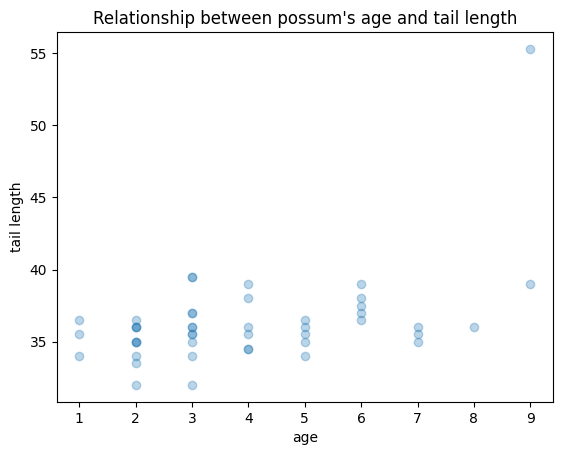

In [4]:
# Read in the data with pandas
possum_data = pd.read_csv('possum.csv')

# Make the scatter plot (don't forget the axis labels)

age = possum_data['age'].to_numpy()
tailL = possum_data['tailL'].to_numpy()

plt.scatter(age, tailL, alpha=0.3)
plt.title("Relationship between possum's age and tail length")
plt.xlabel('age')
plt.ylabel('tail length')
plt.show()

### Question 1.2: /5 point

Recall that the linear model, we obtain predictions by computing 

$$ \hat{\mathbf{y}} = \mathbf{X} \hat{\beta} $$

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\hat{\beta}$ are coefficients, and $\hat{\mathbf{y}}$ are outcomes.  Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector.  The function should take as it's arguments a 1d-array of coefficients `b` and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

Test the function by setting 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
```
and call your function with these values! 

Report $\hat{\mathbf{y}}$. 
What is the dimensionality of the numpy-array that you get back? 

Hint:  Read the documentation for `np.dot` or the `@` operator in `numpy`.

In [7]:
def linearModelPredict(b,X):
    yp = np.dot(X,b)
    return yp

# Always important: Test the new function you have written! 
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
print(linearModelPredict(b,X))
# the returned array is 1 dimensional with 3 elements 

# By the way: What happens when b is a 2d-array? 
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([[0,0.1],[0.1,0.3]])
# print(linearModelPredict(b,X))
# the returned array is 2 dimensional



[ 0.1 -0.2  0.7]


### Question 1.3: /15 points

Write a function `linearModelLossRSS` which computes and returns the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report the loss and the gradient. 

**Written answer**: To minimize the cost do you need increase or decrease the value of the parameters? 

In [14]:
def linearModelLossRSS(b,X,y):
    residual = y - linearModelPredict(b,X)
    residual_sum_of_squares = np.sum(residual ** 2)
    gradient = -2 * np.dot(np.transpose(X), residual)
    return (residual_sum_of_squares, gradient)

#testing linearModelLossRSS
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])

loss, gradient = linearModelLossRSS(b,X,y)
print('loss: {}'.format(loss))
print('gradient: {}'.format(gradient))

#WRITTENT ANSWER: To minimize the cost do you need increase or decrease the value of the parameters? 
#using the test value, both gradients are returned as negative value, thus the parameter should be increased in order to minimize the cost



loss: 2.06
gradient: [-3.6 -4. ]


WRITTEN ANSWER: To minimize the cost do you need increase or decrease the value of the parameters? 

Using the test value, both gradients are returned as negative value, thus the parameter should be increased in order to minimize the cost

### Question 1.4:  /15 points. 

Now that you've implemented a loss function in question 1.3, it is now time to minimize it!

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument the design matrix `X` as a 2d-array, as its second argument a 1d-array `y` of outcomes, and as its third argument a function  `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return the estimated betas and the R2. 

Test the function with the values: 
```
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2]) 
```

Report best parameters and the fitted R2 


In [27]:
def linearModelFit(X,y,lossfcn = linearModelLossRSS):
    #initialise starting values
    bstart = [0,0]

    #call the optimization function
    RESULT = so.minimize(linearModelLossRSS, bstart, args=(X,y), jac=True)
    print(RESULT)

    #set optimised parameters
    estimated_betas = RESULT.x
    
    #calculating R2
    yp = linearModelPredict(b=estimated_betas, X=X)
    RSS = np.sum((y - yp)**2) #Residual sum of squares
    TSS = np.sum((y - np.mean(y))**2)
    R2 = 1 - (RSS/TSS)
    
    return (estimated_betas,R2)

#testing linearModelFit
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2])
estimated_betas, R2 = linearModelFit(X,y)
print('\nbest parameters: {}'.format(estimated_betas))
print('R2: {}'.format(R2))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.56
        x: [ 6.000e-01  6.000e-01]
      nit: 4
      jac: [-4.441e-16 -6.661e-16]
 hess_inv: [[ 1.786e-01 -3.571e-02]
            [-3.571e-02  1.071e-01]]
     nfev: 6
     njev: 6

best parameters: [0.6 0.6]
R2: 0.75


### Question 1.5: /15 points

Use the above functions to fit your model to the possum data. Then use your model and the fitted parameters to make predictions along a grid of equally spaced possum ages.  

Plot the data and add a line for the predicted values. You can get these by generating a new X-matrix with equally spaced ages (using for example np.linspace). Also report the R2 value for the fit. You can do this by either printing out the R2 of the fit or putting it on your plot via the `annotate` function in matplotlib.


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 388.10162450066565
        x: [ 3.335e+01  7.537e-01]
      nit: 5
      jac: [-3.273e-07 -1.040e-07]
 hess_inv: [[ 5.083e-02 -1.010e-02]
            [-1.010e-02  2.553e-03]]
     nfev: 6
     njev: 6


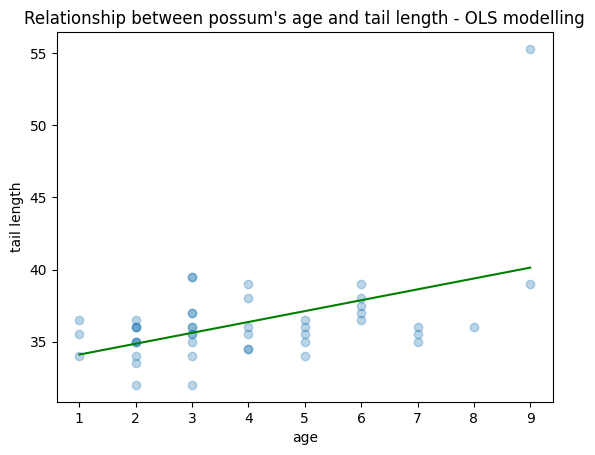


best parameters (OLS model): [0.6 0.6]
R2 (OLS model): 0.22286587947604108


In [34]:
# Make the design matrix using np.c_ 
y = tailL
X =  np.c_[np.ones(len(age)), np.array(age)]
#print(X)

# Call your fitting function
optimised_b, R2 = linearModelFit(X,y)

# Create the scatter plot (see question 1.1)
plt.scatter(age, tailL, alpha=0.3)
plt.title("Relationship between possum's age and tail length - OLS modelling")
plt.xlabel('age')
plt.ylabel('tail length')


# Create a new X matrix with equally space data
age_interval = np.linspace(age.min(), age.max(), age.max())
new_Xmatrix =  np.c_[np.ones(len(age_interval)), np.array(age_interval)]
#print(new_Xmatrix)
estimated_tailL_new = np.dot(new_Xmatrix, optimised_b)
#print(estimated_tailL_new)

# Add the line to the graph 
plt.plot(age_interval,estimated_tailL_new,'g-')
plt.show()

# Report R2 
print('\nbest parameters (OLS model): {}'.format(estimated_betas))
print('R2 (OLS model): {}'.format(R2))

## Part 2: LAD Regression

### Question 2.1:  /15 points

In the previous section, we worked with the squared loss.  Now, we'll implement a linear model with least absolute deviation loss.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model  parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report the loss and the gradient. 

In [19]:
def linearModelLossLAD(b,X,y):
    residual = y - linearModelPredict(b,X)
    sum_abs_dev = np.sum(np.abs(residual))
    grad = -1 * np.dot(np.transpose(X),np.sign(residual))
    #grad = -2 * np.dot(np.transpose(X), residual)
    return (sum_abs_dev,grad)

# testing linearModelLossLAD
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 

loss, gradient = linearModelLossLAD(b,X,y)
print('loss: {}'.format(loss))
print('gradient: {}'.format(gradient))


loss: 2.0
gradient: [-1. -1.]


### Question 2.2: /10 points


Use the above functions to fit your LAD model. Use your model to make predictions along a grid of equally spaced possum ages.  Once fit, add the fitted line to the scatter plot as in question 1.5.  Also report the R2-value. 

**Written answer**: What is the difference in the fit obtained with an L1 as compared to the L2 cost function? Which one has a higher R2 value? Why?  

Note: If you recieve an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum.  This will lead to some gradient based optimizers to fail to converge.  If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.



 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 74.2993299353922
       x: [ 3.475e+01  2.502e-01]
     nit: 4
   direc: [[-2.090e-01  2.312e-02]
           [-3.150e-01  6.308e-02]]
    nfev: 173


C:\Users\Boo\AppData\Local\Temp\ipykernel_3940\2856553859.py:6: RuntimeWarning: Method Powell does not use gradient information (jac).
  RESULT = so.minimize(linearModelLossLAD, bstart, args=(X,y), method='Powell', jac=True) #Powell method is used to compensate for absolute value usage


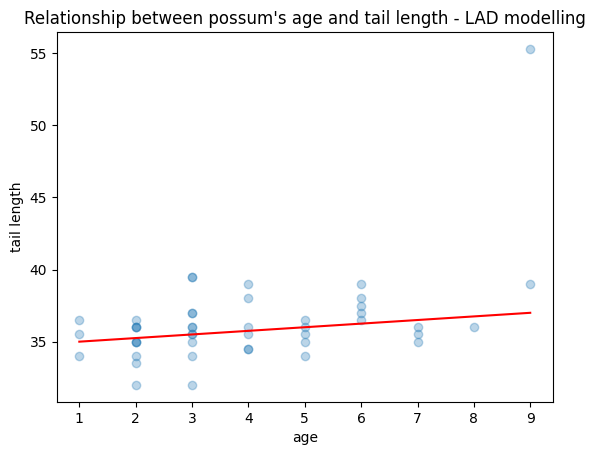


best parameters (LAD model): [34.74949745  0.25016752]
R2 (LAD model): 0.09096474493161588


In [33]:
def linearModelFitLAD(X,y,lossfcn = linearModelLossLAD):
    #initialise starting values
    bstart = [0,0]

    #call the optimization function
    RESULT = so.minimize(linearModelLossLAD, bstart, args=(X,y), method='Powell', jac=True) #Powell method is used to compensate for absolute value usage
    print(RESULT)

    #set optimised parameters
    estimated_betas = RESULT.x
    
    #calculating R2
    yp = linearModelPredict(b=estimated_betas, X=X)
    RSS = np.sum((y - yp)**2) #Residual sum of squares
    TSS = np.sum((y - np.mean(y))**2)
    R2 = 1 - (RSS/TSS)
    
    return (estimated_betas,R2)


# Make the design matrix using np.c_ 
y = tailL
X =  np.c_[np.ones(len(age)), np.array(age)]
#print(X)

# Call your fitting function
optimised_b, R2 = linearModelFitLAD(X,y)

# Create the scatter plot (see question 1.1)
plt.scatter(age, tailL, alpha=0.3)
plt.title("Relationship between possum's age and tail length - LAD modelling")
plt.xlabel('age')
plt.ylabel('tail length')

# Create a new X matrix with equally space data
age_interval = np.linspace(age.min(), age.max(), age.max())
new_Xmatrix =  np.c_[np.ones(len(age_interval)), np.array(age_interval)]
#print(new_Xmatrix)
estimated_tailL_new = np.dot(new_Xmatrix, optimised_b)
#print(estimated_tailL_new)

# Add the line to the graph 
plt.plot(age_interval,estimated_tailL_new, 'r-')
plt.show()

# Reporting the values
print('\nbest parameters (LAD model): {}'.format(optimised_b))
print('R2 (LAD model): {}'.format(R2))

Written answer:

R2 value for the OLS model was returned as 0.22286587947604108

R2 value for the LAD model was returned as 0.09096474493161588

R2 value from the OLS model is higher then that of the LAD value. From the range of 0 ~ 1, values closer to 1 shows the better fit towards explaing all the present variables in the model. Thus, from the values returned, we can say that the OLS model showed better fit.

OLS model having higher R2 values compared to LAD model could be due to the fact that OLS model is more sensitve towards bigger outlier. In the graph, we can see there is a visible outlier for one of the possum aged 9. OLS model will try to accomodate these outliers, leading to overall higher R2 value compared to LAD which will often be less impacted by these significant outliers.


### Question 2.3: /15 points

Fit an OLS model to the possum data with the `linear_model` module from the `sklearn` package by using the `LinearRegression` class.  In no more than two sentences, comment on the rsquared values from `sklearn` and the rsquared values from your models. Are they similar?

In [30]:
# Make the design matrix using np.c_ 
y = tailL
X =  np.c_[np.ones(len(age)), np.array(age)]

new_Fit = linear_model.LinearRegression().fit(X,y)
R2 = new_Fit.score(X,y)
print('\n R2 (OLS model using sklearn package): {}'.format(R2))


 R2 (OLS model using sklearn package): 0.22286587947604108


Written answer: 

Both R2 values from my model and model using sklearn package are the same, 0.22286587947604108